In [1]:
from src.utils.Preprocessing import Preprocessing
from src.engine.MLP import EngineMLP
from config import FRAME_SIZE, HOP, N_MELS, SAMPLERATE, N_MFCC, MAX_SIZE,DEVICE, OUT_DIM
from Dataset import SignalDataset 
from torch.utils.data import DataLoader

# Modelo incluyendo Deltas

In [2]:
preprocessing = Preprocessing(frame_size=FRAME_SIZE,
                  hop = HOP, 
                  n_mels =N_MELS, 
                  n_fft = FRAME_SIZE, 
                  n_mfcc=N_MFCC,
                  samplerate=SAMPLERATE,
                  max_large=MAX_SIZE,
                  include_deltas=True)

In [3]:
model = EngineMLP(input_dim = N_MFCC*6,
                        hidden_dim = 50,
                        output_dim = OUT_DIM,
                        n_layers = 1,
                        batch_size = 28,
                        learning_rate = 0.002,
                        dropout = 0.2,
                        preprocessing = preprocessing)


## Se entrena modelo y se genera model.pth

In [4]:
model.train(epochs=100, patience=20, delta=0.01)

Validación: 100%|██████████| 990/990 [00:02<00:00, 422.22it/s]


Epoca: 0, 	Train_loss: 2.3755, 	Val loss: 2.3244, 	Acc: 0.2545


Validación: 100%|██████████| 990/990 [00:01<00:00, 536.42it/s]


Epoca: 1, 	Train_loss: 2.2590, 	Val loss: 2.1453, 	Acc: 0.5253


Validación: 100%|██████████| 990/990 [00:01<00:00, 514.25it/s]


Epoca: 2, 	Train_loss: 2.0912, 	Val loss: 2.0109, 	Acc: 0.5788


Validación: 100%|██████████| 990/990 [00:04<00:00, 212.39it/s]


Epoca: 3, 	Train_loss: 1.9832, 	Val loss: 1.9224, 	Acc: 0.6980


Validación: 100%|██████████| 990/990 [00:02<00:00, 472.26it/s]


Epoca: 4, 	Train_loss: 1.9043, 	Val loss: 1.8967, 	Acc: 0.6768


Validación: 100%|██████████| 990/990 [00:01<00:00, 497.90it/s]


Epoca: 5, 	Train_loss: 1.8425, 	Val loss: 1.7944, 	Acc: 0.7828


Validación: 100%|██████████| 990/990 [00:03<00:00, 323.59it/s]


Epoca: 6, 	Train_loss: 1.7837, 	Val loss: 1.7537, 	Acc: 0.8212


Validación: 100%|██████████| 990/990 [00:02<00:00, 494.48it/s]


Epoca: 7, 	Train_loss: 1.7413, 	Val loss: 1.7629, 	Acc: 0.8061


Validación: 100%|██████████| 990/990 [00:02<00:00, 459.96it/s]


Epoca: 8, 	Train_loss: 1.7228, 	Val loss: 1.7263, 	Acc: 0.8404


Validación: 100%|██████████| 990/990 [00:01<00:00, 495.71it/s]


Epoca: 9, 	Train_loss: 1.6936, 	Val loss: 1.7268, 	Acc: 0.8333


Validación: 100%|██████████| 990/990 [00:01<00:00, 520.01it/s]


Epoca: 10, 	Train_loss: 1.6871, 	Val loss: 1.6772, 	Acc: 0.8808


Validación: 100%|██████████| 990/990 [00:01<00:00, 502.69it/s]


Epoca: 11, 	Train_loss: 1.6696, 	Val loss: 1.6671, 	Acc: 0.8859


Validación: 100%|██████████| 990/990 [00:01<00:00, 522.86it/s]


Epoca: 12, 	Train_loss: 1.6598, 	Val loss: 1.6500, 	Acc: 0.9040


Validación: 100%|██████████| 990/990 [00:02<00:00, 444.11it/s]


Epoca: 13, 	Train_loss: 1.6449, 	Val loss: 1.6518, 	Acc: 0.9061


Validación: 100%|██████████| 990/990 [00:02<00:00, 494.94it/s]


Epoca: 14, 	Train_loss: 1.6351, 	Val loss: 1.6496, 	Acc: 0.9020


Validación: 100%|██████████| 990/990 [00:01<00:00, 497.42it/s]


Epoca: 15, 	Train_loss: 1.6283, 	Val loss: 1.6429, 	Acc: 0.9121


Validación: 100%|██████████| 990/990 [00:01<00:00, 503.95it/s]


Epoca: 16, 	Train_loss: 1.6257, 	Val loss: 1.6464, 	Acc: 0.9071


Validación: 100%|██████████| 990/990 [00:01<00:00, 496.79it/s]


Epoca: 17, 	Train_loss: 1.6286, 	Val loss: 1.6486, 	Acc: 0.9020


Validación: 100%|██████████| 990/990 [00:01<00:00, 501.55it/s]


Epoca: 18, 	Train_loss: 1.6332, 	Val loss: 1.6482, 	Acc: 0.9081


Validación: 100%|██████████| 990/990 [00:01<00:00, 504.07it/s]


Epoca: 19, 	Train_loss: 1.6382, 	Val loss: 1.6517, 	Acc: 0.8980


Validación: 100%|██████████| 990/990 [00:01<00:00, 509.09it/s]


Epoca: 20, 	Train_loss: 1.6409, 	Val loss: 1.6682, 	Acc: 0.8949


Validación: 100%|██████████| 990/990 [00:02<00:00, 491.23it/s]


Epoca: 21, 	Train_loss: 1.6522, 	Val loss: 1.6468, 	Acc: 0.9101


Validación: 100%|██████████| 990/990 [00:01<00:00, 500.00it/s]


Epoca: 22, 	Train_loss: 1.6533, 	Val loss: 1.6678, 	Acc: 0.8848


Validación: 100%|██████████| 990/990 [00:01<00:00, 496.23it/s]


Epoca: 23, 	Train_loss: 1.6594, 	Val loss: 1.6826, 	Acc: 0.8747


Validación: 100%|██████████| 990/990 [00:02<00:00, 486.10it/s]


Epoca: 24, 	Train_loss: 1.6679, 	Val loss: 1.6968, 	Acc: 0.8576


Validación: 100%|██████████| 990/990 [00:01<00:00, 501.19it/s]


Epoca: 25, 	Train_loss: 1.6459, 	Val loss: 1.6609, 	Acc: 0.8879


Validación: 100%|██████████| 990/990 [00:02<00:00, 478.49it/s]


Epoca: 26, 	Train_loss: 1.6365, 	Val loss: 1.6409, 	Acc: 0.9061


Validación: 100%|██████████| 990/990 [00:02<00:00, 451.36it/s]


Epoca: 27, 	Train_loss: 1.6316, 	Val loss: 1.6380, 	Acc: 0.9101


Validación: 100%|██████████| 990/990 [00:01<00:00, 514.11it/s]


Epoca: 28, 	Train_loss: 1.6241, 	Val loss: 1.6484, 	Acc: 0.9020


Validación: 100%|██████████| 990/990 [00:01<00:00, 511.48it/s]


Epoca: 29, 	Train_loss: 1.6189, 	Val loss: 1.6281, 	Acc: 0.9172


Validación: 100%|██████████| 990/990 [00:02<00:00, 483.74it/s]


Epoca: 30, 	Train_loss: 1.6072, 	Val loss: 1.6305, 	Acc: 0.9182


Validación: 100%|██████████| 990/990 [00:02<00:00, 478.08it/s]


Epoca: 31, 	Train_loss: 1.6061, 	Val loss: 1.6235, 	Acc: 0.9242


Validación: 100%|██████████| 990/990 [00:01<00:00, 495.31it/s]


Epoca: 32, 	Train_loss: 1.6044, 	Val loss: 1.6252, 	Acc: 0.9232


Validación: 100%|██████████| 990/990 [00:02<00:00, 460.99it/s]


Epoca: 33, 	Train_loss: 1.6054, 	Val loss: 1.6290, 	Acc: 0.9192


Validación: 100%|██████████| 990/990 [00:02<00:00, 478.14it/s]


Epoca: 34, 	Train_loss: 1.6103, 	Val loss: 1.6387, 	Acc: 0.9051


Validación: 100%|██████████| 990/990 [00:01<00:00, 495.54it/s]


Epoca: 35, 	Train_loss: 1.6140, 	Val loss: 1.6466, 	Acc: 0.9010


Validación: 100%|██████████| 990/990 [00:02<00:00, 487.25it/s]


Epoca: 36, 	Train_loss: 1.6260, 	Val loss: 1.6681, 	Acc: 0.8818


Validación: 100%|██████████| 990/990 [00:02<00:00, 448.72it/s]


Epoca: 37, 	Train_loss: 1.6311, 	Val loss: 1.6563, 	Acc: 0.8859


Validación: 100%|██████████| 990/990 [00:02<00:00, 472.76it/s]


Epoca: 38, 	Train_loss: 1.6461, 	Val loss: 1.6700, 	Acc: 0.8828


Validación: 100%|██████████| 990/990 [00:01<00:00, 498.09it/s]


Epoca: 39, 	Train_loss: 1.6533, 	Val loss: 1.6309, 	Acc: 0.9192


Validación: 100%|██████████| 990/990 [00:01<00:00, 516.64it/s]


Epoca: 40, 	Train_loss: 1.6457, 	Val loss: 1.6544, 	Acc: 0.8960


Validación: 100%|██████████| 990/990 [00:02<00:00, 479.63it/s]


Epoca: 41, 	Train_loss: 1.6365, 	Val loss: 1.6734, 	Acc: 0.8758


Validación: 100%|██████████| 990/990 [00:01<00:00, 501.11it/s]


Epoca: 42, 	Train_loss: 1.6246, 	Val loss: 1.6371, 	Acc: 0.9121


Validación: 100%|██████████| 990/990 [00:01<00:00, 502.89it/s]


Epoca: 43, 	Train_loss: 1.6232, 	Val loss: 1.6424, 	Acc: 0.9051


Validación: 100%|██████████| 990/990 [00:01<00:00, 516.17it/s]


Epoca: 44, 	Train_loss: 1.6101, 	Val loss: 1.6366, 	Acc: 0.9121


Validación: 100%|██████████| 990/990 [00:01<00:00, 515.24it/s]


Epoca: 45, 	Train_loss: 1.6060, 	Val loss: 1.6259, 	Acc: 0.9222


Validación: 100%|██████████| 990/990 [00:01<00:00, 516.56it/s]


Epoca: 46, 	Train_loss: 1.6016, 	Val loss: 1.6259, 	Acc: 0.9232


Validación: 100%|██████████| 990/990 [00:02<00:00, 474.92it/s]


Epoca: 47, 	Train_loss: 1.5926, 	Val loss: 1.6239, 	Acc: 0.9172


Validación: 100%|██████████| 990/990 [00:01<00:00, 496.57it/s]


Epoca: 48, 	Train_loss: 1.5919, 	Val loss: 1.6240, 	Acc: 0.9192


Validación: 100%|██████████| 990/990 [00:02<00:00, 490.66it/s]


Epoca: 49, 	Train_loss: 1.5981, 	Val loss: 1.6271, 	Acc: 0.9212


Validación: 100%|██████████| 990/990 [00:01<00:00, 496.78it/s]


Epoca: 50, 	Train_loss: 1.5987, 	Val loss: 1.6235, 	Acc: 0.9232


Validación: 100%|██████████| 990/990 [00:01<00:00, 497.85it/s]

Epoca: 51, 	Train_loss: 1.5979, 	Val loss: 1.6337, 	Acc: 0.9172
Patience alcanzada, terminando entrenamiento


## Se carga modelo (solo si se tiene disponible)

In [5]:
model.load_model("model.pth")

c:\Users\Admin\Desktop\deep3\src\engine\MLP.py:126: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


## Se evalua modelo

Evaluación: 100%|██████████| 484/484 [00:01<00:00, 410.91it/s]


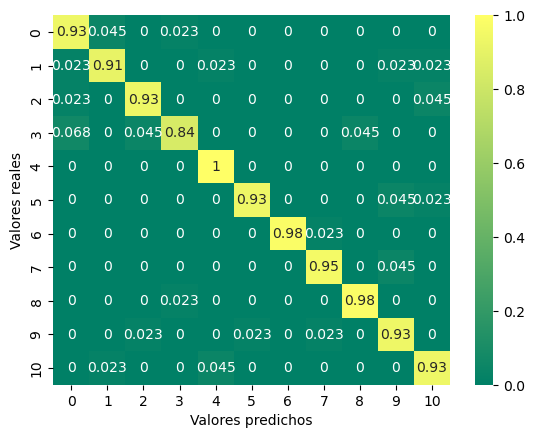

Accuracy: 0.9380165338516235


In [6]:
model.evaluate(DataLoader(SignalDataset("test",preprocessing),shuffle=False))

# Comparativa hiperparámetros

In [7]:
from src.utils.utils import compare_losses

In [8]:
hidden_dims, losses_hidden_dim = [20,40,50,100],[]
batch_sizes, losses_batch_sizes = [16,28,32,64],[]
n_layers, losses_n_layers = [1,5,10,20], []
lrs, losses_lrs = [0.1,0.001,0.002,0.0001], []

### hidden_dim

In [9]:
%%capture
for param in hidden_dims:
    model = EngineMLP(input_dim = N_MFCC*6,
                        hidden_dim = param,
                        output_dim = OUT_DIM,
                        n_layers = 1,
                        batch_size = 28,
                        learning_rate = 0.002,
                        dropout = 0.2,
                        preprocessing = preprocessing)
    model.train(epochs=100, patience=10, delta=0.01,save_model=False)
    losses_hidden_dim.append(model.return_losses())

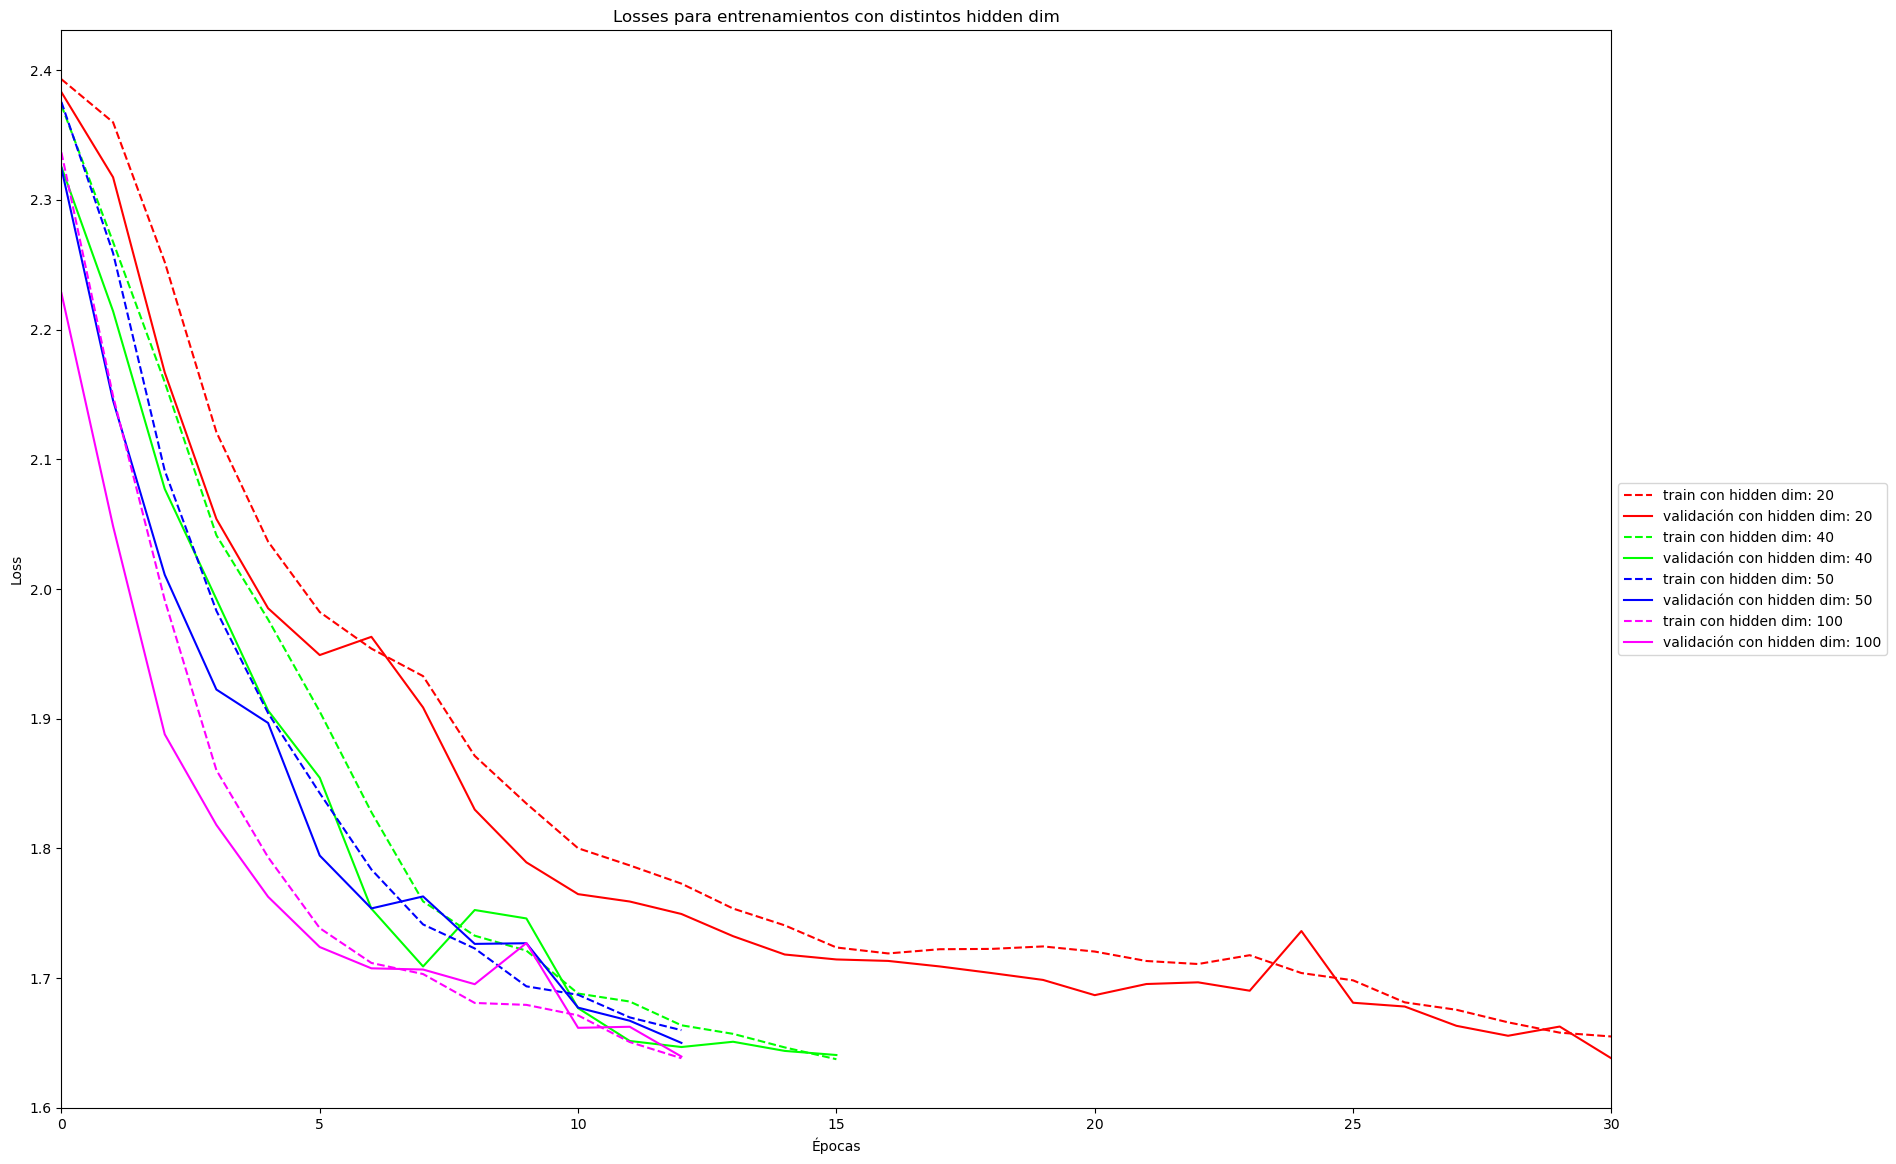

In [10]:
compare_losses(losses_hidden_dim,hidden_dims,"hidden dim")

### batch_size

In [11]:
%%capture
for param in batch_sizes:
    model = EngineMLP(input_dim = N_MFCC*6,
                        hidden_dim = 50,
                        output_dim = OUT_DIM,
                        n_layers = 1,
                        batch_size = param,
                        learning_rate = 0.002,
                        dropout = 0.2,
                        preprocessing = preprocessing)
    model.train(epochs=100, patience=10, delta=0.01,save_model=False)
    losses_batch_sizes.append(model.return_losses())

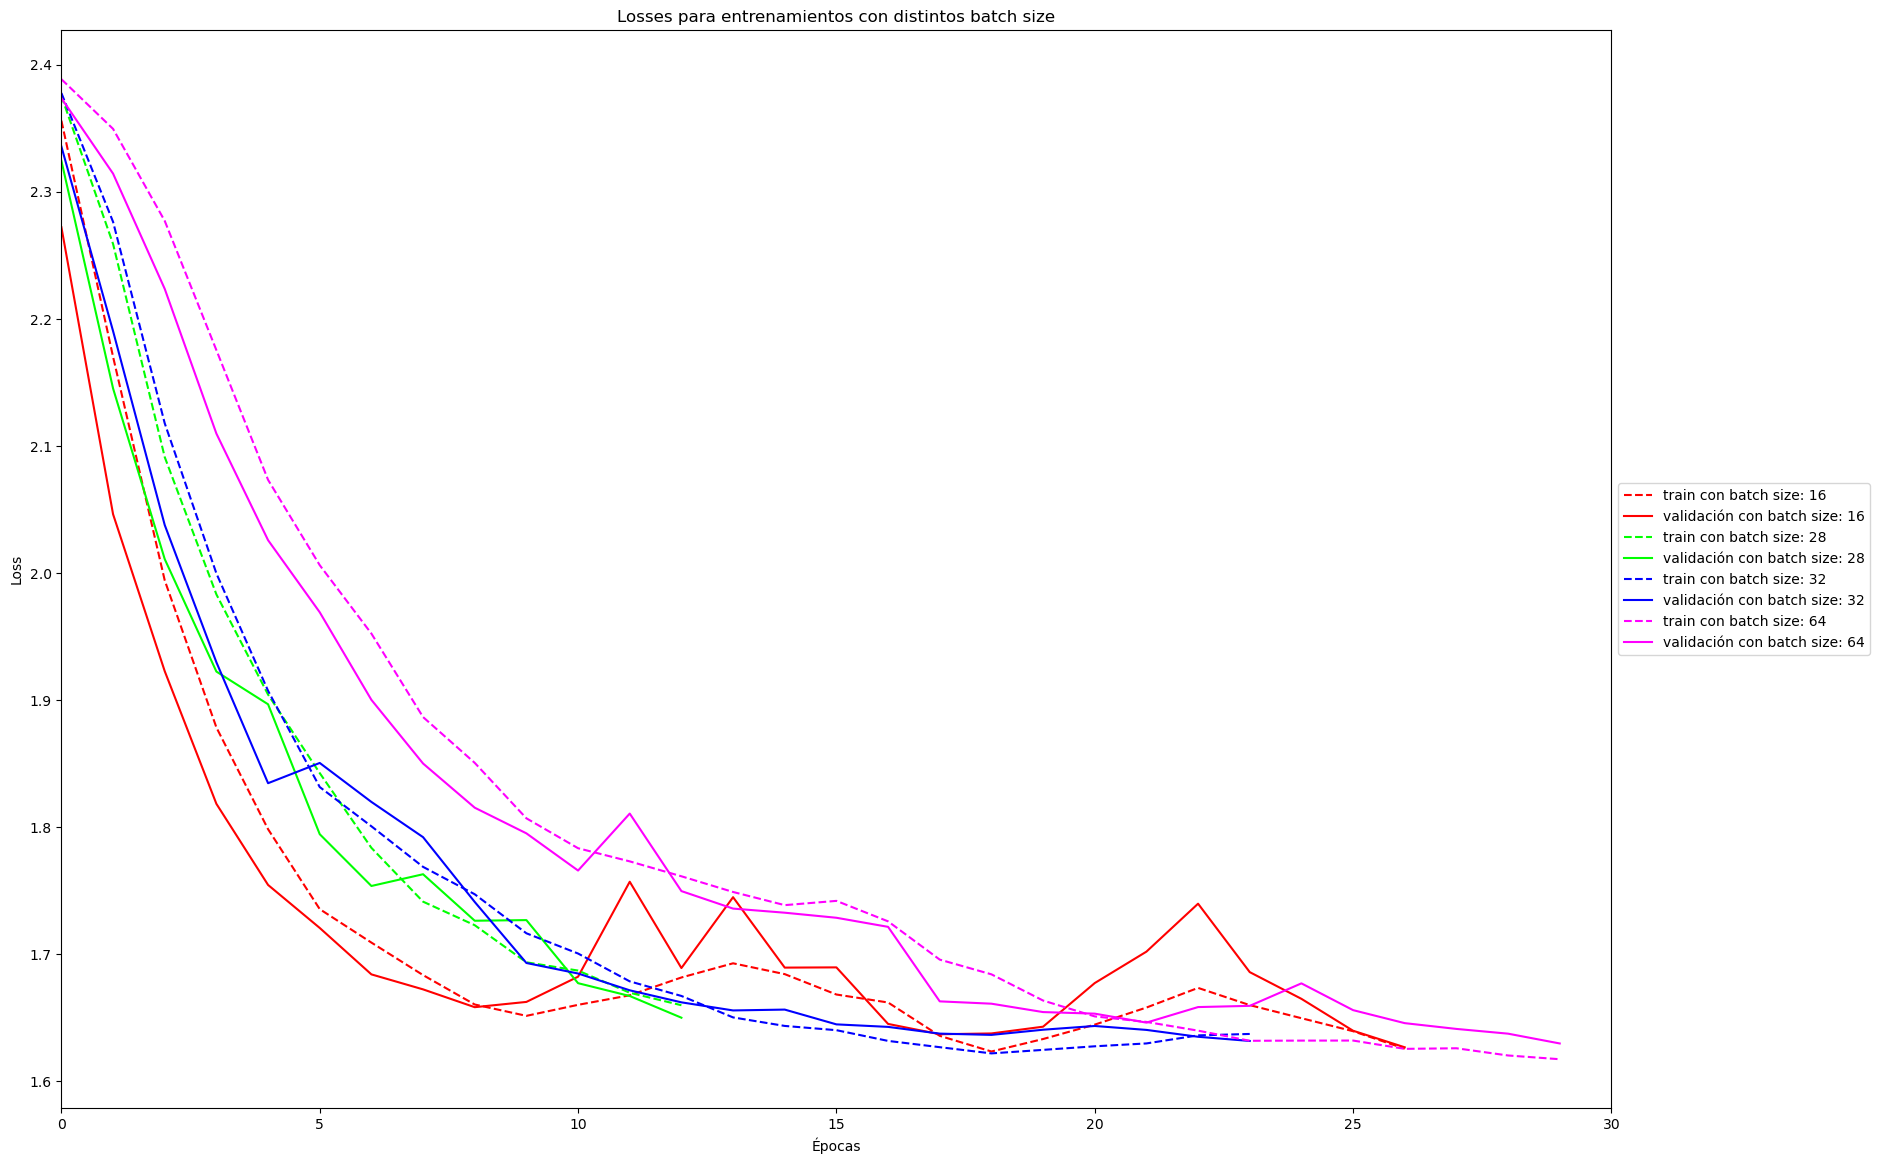

In [12]:
compare_losses(losses_batch_sizes,batch_sizes,"batch size")

### n_layers

In [13]:
%%capture
for param in n_layers:
    model = EngineMLP(input_dim = N_MFCC*6,
                        hidden_dim = 50,
                        output_dim = OUT_DIM,
                        n_layers = param,
                        batch_size = 28,
                        learning_rate = 0.002,
                        dropout = 0.2,
                        preprocessing = preprocessing)
    model.train(epochs=100, patience=10, delta=0.01,save_model=False)
    losses_n_layers.append(model.return_losses())

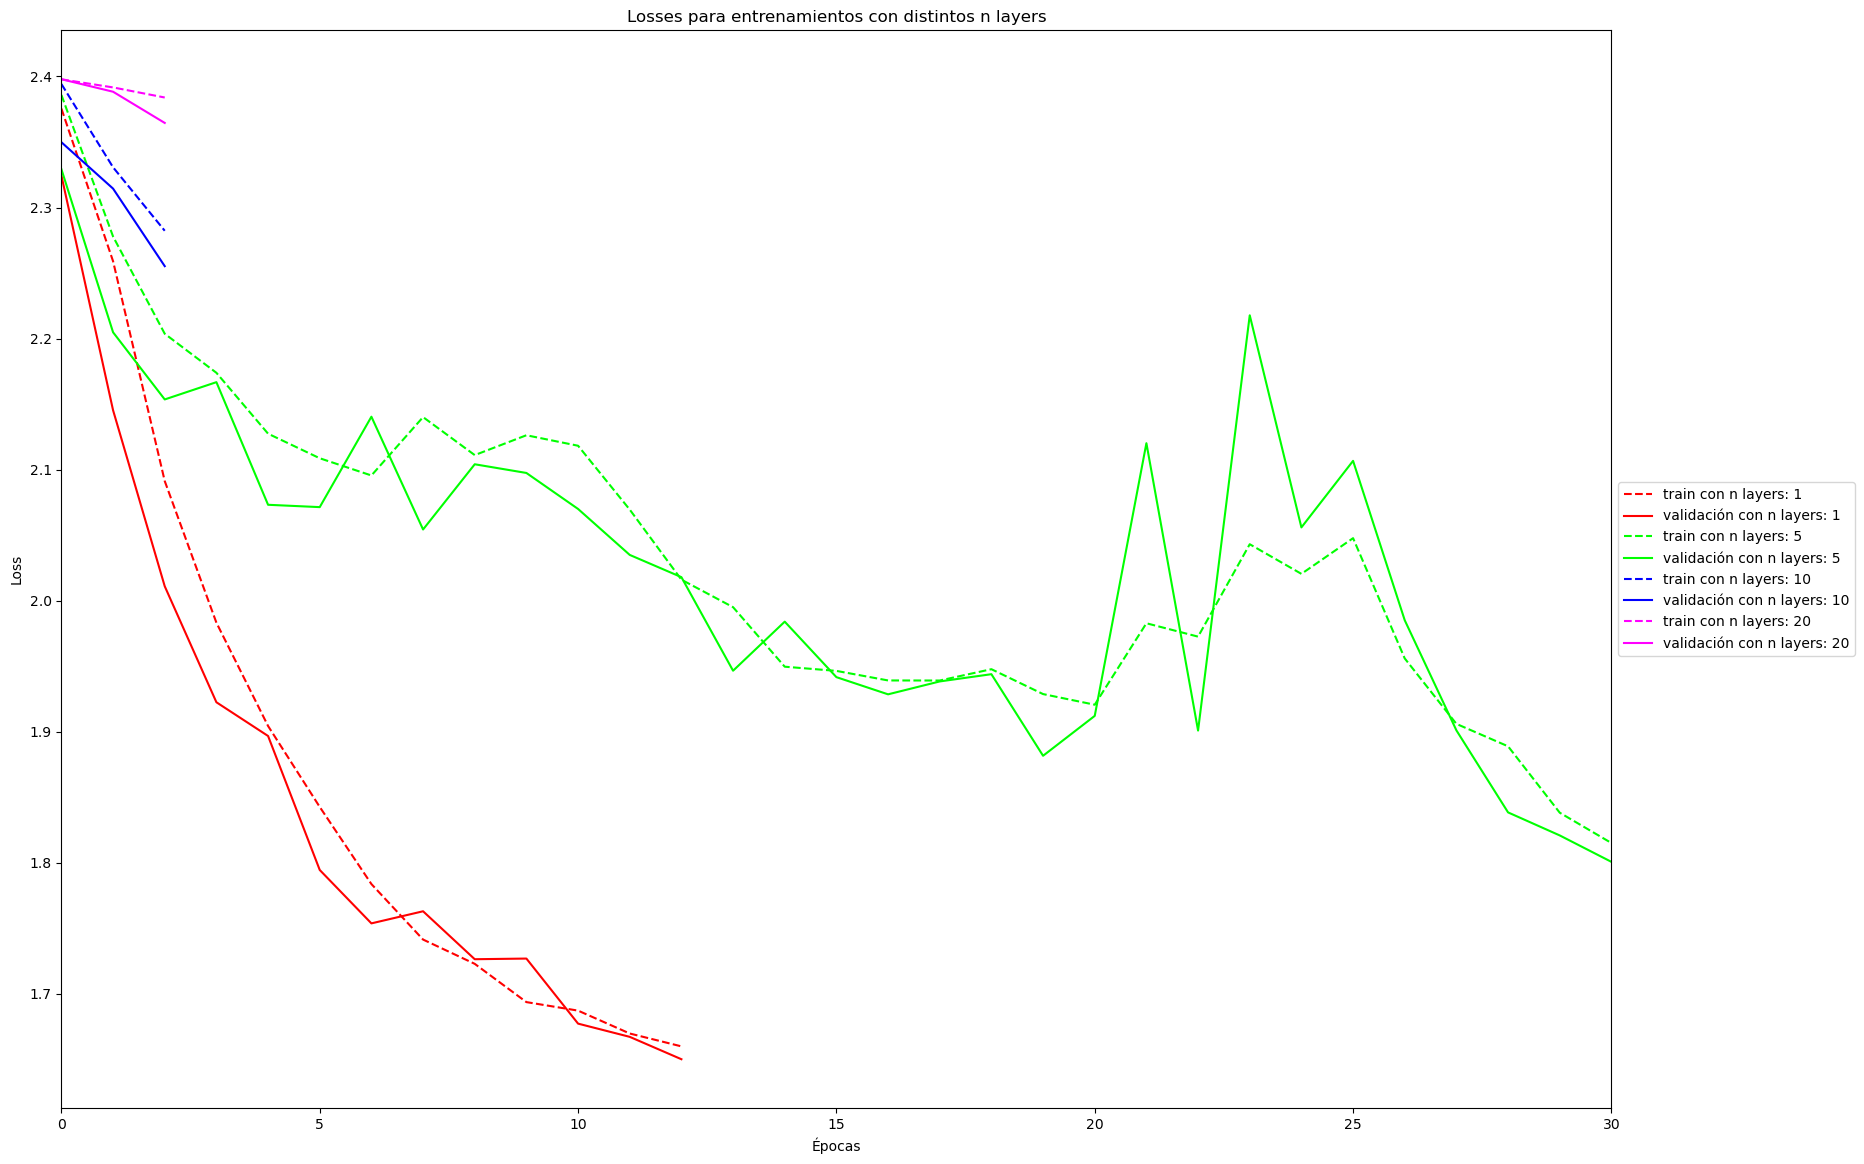

In [14]:
compare_losses(losses_n_layers,n_layers,"n layers")

### learning_rate

In [15]:
%%capture
for param in lrs:
    model = EngineMLP(input_dim = N_MFCC*6,
                        hidden_dim = 50,
                        output_dim = OUT_DIM,
                        n_layers = 1,
                        batch_size = 28,
                        learning_rate = param,
                        dropout = 0.2,
                        preprocessing = preprocessing)
    model.train(epochs=100, patience=10, delta=0.01,save_model=False)
    losses_lrs.append(model.return_losses())

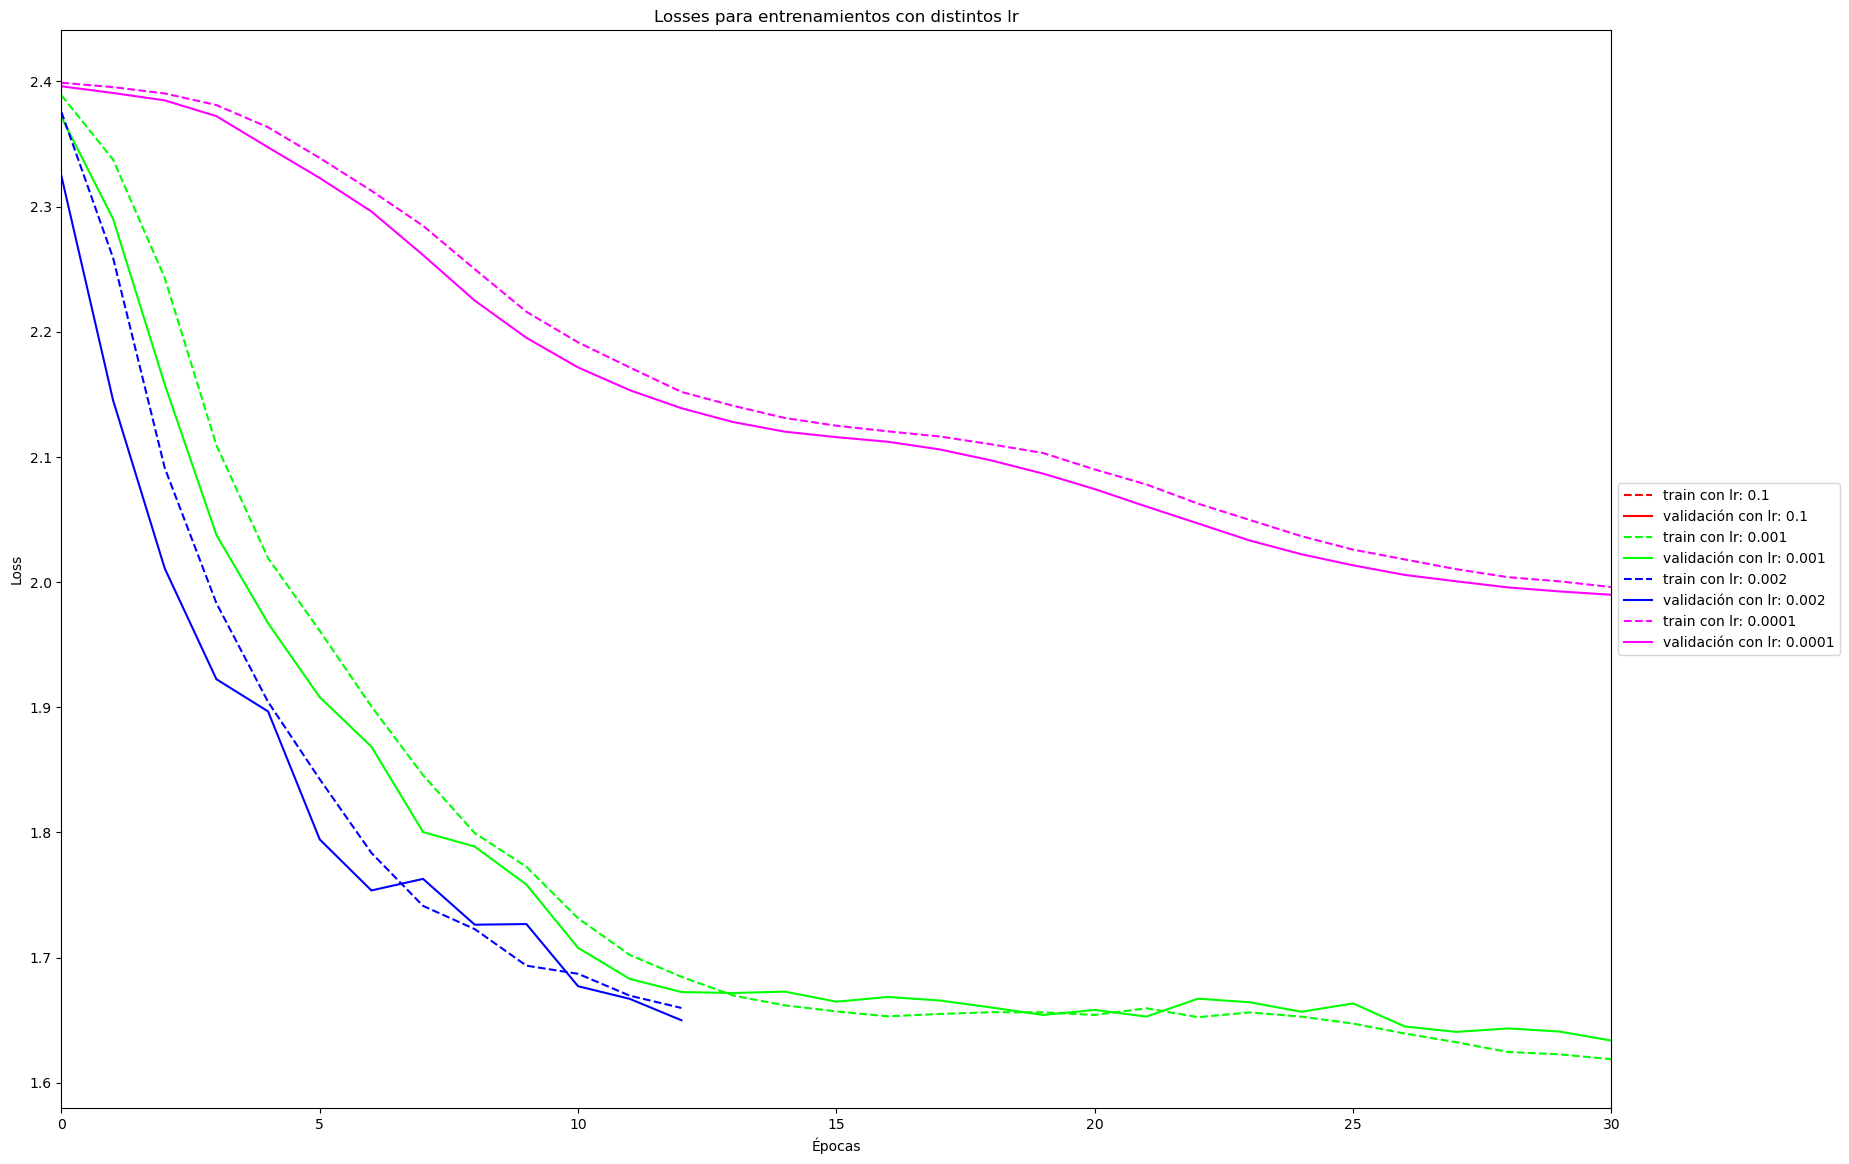

In [16]:
compare_losses(losses_lrs,lrs,"lr")